# **Step 1: Data Loading and Initial Exploration**

## 🎯 Objective
Begin working with the Sarcopenia dataset by exploring its structure, cleaning the data, and preparing it for machine learning modeling.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sampled_Sarcopenia_Data.csv to Sampled_Sarcopenia_Data.csv


## ***📥 Load the Dataset***
- Import the dataset into a **Pandas DataFrame**.  
- Verify that the data is loaded correctly.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("Sampled_Sarcopenia_Data.csv")
print("✅ Dataset loaded successfully.")

✅ Dataset loaded successfully.


## ***📊 Check Dataset Size***
- Identify the number of **rows** (*patients*) and **columns** (*features*).

In [ ]:
df.shape

(1499, 41)

In [ ]:
# Check the shape of the dataset
print(f"Dataset Shape: {...} rows and {...} columns.")

Dataset Shape: Ellipsis rows and Ellipsis columns.


## ***📝 Review Column Names and Data Types***
- Understand what features are included in the dataset.  
- Identify the **target variable** for prediction (**Sarcopenia**).



In [ ]:
df.columns

Index(['MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'Diabetes Duration',
       'Insulin', 'Diabetes Drug', 'Hyperlipidemia', 'Hyperlipidemia Duration',
       'Dyslipidemia drugs ', 'Coronary Artery Disease', 'KAH duration',
       'Hypothyroidism', 'Asthma', 'COPD', 'OP', 'Other(s)', 'HT',
       'Anti-HT Drug Type', 'HT duration', 'N_AntiHT',
       '1st anti-HT (active ingredient)', 'Duratin of drug use', 'Education',
       'Occupation', 'Working Status', 'Exercise', 'AT', 'CST', 'Gait Speed',
       'Grip Strength', 'STAR', 'BMI', 'Sarcopenia', 'Gender'],
      dtype='object')

In [ ]:
#Print the columns from second to fifth
df.columns[2:6]

Index(['Weight ', 'Height ', 'Waist ', 'Hip'], dtype='object')

In [ ]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking (packet/year)', 'Alcohol', 'DM', 'Diabetes Duration',
       'Insulin', 'Diabetes Drug', 'Hyperlipidemia', 'Hyperlipidemia Duration',
       'Dyslipidemia drugs', 'Coronary Artery Disease', 'KAH duration',
       'Hypothyroidism', 'Asthma', 'COPD', 'OP', 'Other(s)', 'HT',
       'Anti-HT Drug Type', 'HT duration', 'N_AntiHT',
       '1st anti-HT (active ingredient)', 'Duratin of drug use', 'Education',
       'Occupation', 'Working Status', 'Exercise', 'AT', 'CST', 'Gait Speed',
       'Grip Strength', 'STAR', 'BMI', 'Sarcopenia', 'Gender'],
      dtype='object')

In [ ]:
# Display the columns and data types
#What do you observe?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MMSE                             875 non-null    float64
 1   Age                              1160 non-null   float64
 2   Weight                           1159 non-null   float64
 3   Height                           1159 non-null   float64
 4   Waist                            1011 non-null   float64
 5   Hip                              1010 non-null   float64
 6   Smoking                          1161 non-null   float64
 7   Smoking (packet/year)            1161 non-null   float64
 8   Alcohol                          1161 non-null   object 
 9   DM                               1161 non-null   float64
 10  Diabetes Duration                1145 non-null   object 
 11  Insulin                          1159 non-null   object 
 12  Diabetes Drug       

## ***📌 Select Relevant Features***
- Keep only the features important for modeling.  
- Drop any **unnecessary** or **irrelevant** columns.

In [ ]:
# Select relevant features for modeling
selected_features = ['Age', 'Gender', 'Weight', 'Height', 'DM', 'CST', 'HT',
                     'BMI', 'Exercise', 'Education', 'Smoking', 'STAR','Grip Strength', 'Sarcopenia']

# keep only the selected features
df = df[selected_features]

## ***🔎 Identify and Handle Missing Values***
- Detect any **missing** or **invalid** data.  
- Decide whether to:
  - **Drop** rows with missing values,  
  - **Impute** missing values, or  
  - **Replace** invalid data.

In [ ]:
# Get unique value counts for each column
unique_counts = df.nunique()

# Display the results
print(unique_counts)

Age               48
Gender             2
Weight            79
Height            52
DM                 2
CST              216
HT                 2
BMI              559
Exercise           5
Education         14
Smoking            2
STAR             152
Grip Strength     56
Sarcopenia         2
dtype: int64


In [ ]:
#display the unique values for 'Education'
df['Education'].unique()

array(['Primary School', 'University', 'ilkokul', 'High School',
       'Secondary School', nan, 'Primary shool', 'illiterate', 'lise',
       'okuryazar değil', 'ortaokul', 'primary school', 'üniversite',
       'high school', 'university'], dtype=object)

In [ ]:
#count number of observations for each unique value of 'Education'
df['Education'].value_counts()

Education
Primary School      482
High School         178
University          142
illiterate          119
Secondary School    118
ilkokul              43
Primary shool        28
lise                 12
okuryazar değil       6
university            6
ortaokul              3
üniversite            3
high school           3
primary school        2
Name: count, dtype: int64

In [ ]:
# Loop through columns and print unique values with their counts for columns with less than 20 unique values
for col in df.columns:
    if df[col].nunique() < 20:
        print(f"\nUnique values and their counts in '{col}':")
        print(df[col].value_counts())


Unique values and their counts in 'Gender':
Gender
F    867
M    294
Name: count, dtype: int64

Unique values and their counts in 'DM':
DM
0.0    803
1.0    358
Name: count, dtype: int64

Unique values and their counts in 'HT':
HT
1.0    674
0.0    485
Name: count, dtype: int64

Unique values and their counts in 'Exercise':
Exercise
0           701
3-4/week    262
1-2/week    145
3-4 hf       26
1-2 hf        9
Name: count, dtype: int64

Unique values and their counts in 'Education':
Education
Primary School      482
High School         178
University          142
illiterate          119
Secondary School    118
ilkokul              43
Primary shool        28
lise                 12
okuryazar değil       6
university            6
ortaokul              3
üniversite            3
high school           3
primary school        2
Name: count, dtype: int64

Unique values and their counts in 'Smoking':
Smoking
0.0    783
1.0    378
Name: count, dtype: int64

Unique values and their counts in '

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\n🔍 Missing Values in Each Column:\n")
print(missing_values[missing_values > 0])

# Drop rows with missing values
df.dropna(inplace=True)
print(f"\n✅ After dropping missing values, dataset shape: {df.shape}")


🔍 Missing Values in Each Column:

Age              339
Gender           338
Weight           340
Height           340
DM               338
CST              342
HT               340
BMI              341
Exercise         356
Education        354
Smoking          338
STAR             342
Grip Strength    339
Sarcopenia       340
dtype: int64

✅ After dropping missing values, dataset shape: (1132, 14)


In [ ]:
#rename 'Grip Strength' to 'HGS' and 'Sarcopenia' to 'Sarc'
df = df.rename(columns={'Grip Strength': "HGS",'Sarcopenia': 'Sarc'})

In [ ]:
# List of columns to clean and encode
cols_to_clean = ['Gender', 'DM', 'HT', 'Exercise', 'Education', 'Smoking', 'HGS','Sarc']

#  Encode 'Exercise'
exercise_map = {
    '0': 0,
    '1-2/week': 1,
    '1-2 hf': 1,
    '3-4/week': 2,
    '3-4 hf': 2
}
df['Exercise'] = df['Exercise'].map(exercise_map).astype(int)

# Encode 'Education'
education_map = {
    'illiterate': 0,
    'okuryazar değil': 0,
    'Primary School': 1,
    'primary school': 1,
    'ilkokul': 1,
    'Primary shool': 1,
    'Secondary School': 2,
    'ortaokul': 2,
    'High School': 3,
    'high school': 3,
    'lise': 3,
    'University': 4,
    'university': 4,
    'üniversite': 4
}
df['Education'] = df['Education'].map(education_map).astype(int)

# Encode 'Smoking': 0 -> Non-smoker, 1 -> Smoker
df.loc[:,'Smoking'] = df['Smoking'].astype(int)

In [ ]:
# 1. Encode 'Gender': F -> 0, M -> 1
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [ ]:

#  Ensure 'DM', 'HT', 'Sarcopenia' are integers
df.loc[:,'DM'] = df['DM'].astype(int)
df.loc[:,'HT'] = df['HT'].astype(int)
df.loc[:,'Sarc'] = df['Sarc'].astype(int)

# df['Exercise'] = df['Exercise'].map({0: "Exc_0", 1: "Exc_1", 2 : "Exc_2"})
# df['Education'] = df['Education'].map({4: "Edu_4", 3: "Edu_3", 2 : "Edu_2", 1:'Edu_1',0:'Edu_0'})
# df['DM'] = df['DM'].map({0:'DM_0', 1: 'DM_1'})
# df['HT'] = df['HT'].map({0:'HT_0', 1: 'HT_1'})
# df['Smoking'] = df['Smoking'].map({0:'Smoking_0', 1: 'Smoking_1'})

# Display the cleaned and encoded DataFrame
df.head()

,Age,Gender,Weight,Height,DM,CST,HT,BMI,Exercise,Education,Smoking,STAR,HGS,Sarc
0,56.0,0,83.0,159.0,0.0,9.10,1.0,32.80,0,1,0.0,1.26,34.0,0.0
1,52.0,0,75.0,162.0,1.0,9.30,0.0,28.58,0,4,0.0,1.63,28.0,0.0
2,67.0,0,79.0,150.0,1.0,11.32,1.0,35.11,0,1,0.0,1.03,22.0,0.0
3,60.0,0,60.0,155.0,0.0,11.20,0.0,24.97,2,1,0.0,1.78,28.0,0.0
4,66.0,0,84.0,157.0,1.0,13.40,1.0,34.00,0,1,0.0,0.74,16.0,1.0


## ***⚠️ Check for Non-Numeric Data in Numeric Columns***
- Identify if any **numeric columns** contain **non-numeric values** (e.g., strings or symbols).  
- **Clean** or **convert** these values appropriately.

In [ ]:
# Check for non-numeric values in numeric columns
for col in ['Age', 'Weight', 'Height', 'CST', 'BMI', 'STAR']:
    non_numeric = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna() & df[col].notna()
    if non_numeric.any():
        print(f"⚠️ Non-numeric values found in column '{col}': {df[col][non_numeric].unique()}")

## ***📊 Display Basic Statistics***
- Use **descriptive statistics** to understand the data distribution:  
  - **Mean**, **Standard Deviation**, **Minimum**, and **Maximum** values.

In [ ]:
# Display basic statistics for numeric columns
df.describe()

,Age,Gender,Weight,Height,DM,CST,HT,BMI,Exercise,Education,Smoking,STAR,HGS,Sarc
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,61.950530,0.252650,77.437279,159.888693,0.311837,11.367774,0.588339,30.433136,0.643110,1.731449,0.331272,1.224761,26.114841,0.198763
std,9.494716,0.434724,13.517534,8.826352,0.463449,4.250890,0.492352,5.482911,0.858626,1.244745,0.470879,0.314279,9.403499,0.399246
min,44.000000,0.000000,34.000000,125.000000,0.000000,1.100000,0.000000,13.930000,0.000000,0.000000,0.000000,0.390000,0.000000,0.000000
25%,55.000000,0.000000,68.000000,154.000000,0.000000,8.900000,0.000000,26.600000,0.000000,1.000000,0.000000,1.000000,20.000000,0.000000
50%,62.000000,0.000000,77.000000,159.000000,0.000000,10.700000,1.000000,29.800000,0.000000,1.000000,0.000000,1.200000,24.000000,0.000000
75%,68.000000,1.000000,86.000000,165.000000,1.000000,12.700000,1.000000,33.415000,2.000000,3.000000,1.000000,1.420000,30.000000,0.000000
max,92.000000,1.000000,137.000000,196.000000,1.000000,50.000000,1.000000,56.000000,2.000000,4.000000,1.000000,2.570000,95.000000,1.000000


In [ ]:
df = df.reset_index()
df.rename(columns={'index':"ID"}, inplace=True)

# **📊 Step 2: Exploratory Data Analysis (EDA)**

## 🎯 **Objective**
Gain insights into the dataset by exploring how features differ across **Gender** and **Sarcopenia** status. This analysis will help uncover important patterns and relationships before building predictive models.

---

## **🔖 Instructions**

1. **Understand Feature Distributions Across Genders**  
   - Visualize how numerical features differ between **Male** and **Female** patients.

2. **Analyze Data Grouped by Gender and Sarcopenia**  
   - Check how features vary when grouped by both **Gender** and **Sarcopenia** status.

3. **Perform Statistical Testing**  
   - Use statistical tests (e.g., **t-test**) to check if the differences between groups are statistically significant.

---

### **📊 1. Compare Feature Distributions Across Genders**

In [ ]:
gender_summary = df.groupby('Gender')[['Age', 'Weight', 'Height', 'CST', 'BMI', 'STAR']].agg(['min','mean', 'max'])
gender_summary

Age                  Weight                   Height             \
         min       mean   max    min       mean    max    min       mean   
Gender                                                                     
0       44.0  61.693853  92.0   34.0  75.901891  137.0  125.0  156.51773   
1       45.0  62.709790  92.0   45.0  81.979021  133.0  150.0  169.86014   

               CST                     BMI                   STAR            \
          max  min       mean   max    min       mean   max   min      mean   
Gender                                                                        
0       180.0  1.1  11.591099  50.0  13.93  31.094267  56.0  0.39  1.142199   
1       196.0  5.0  10.707168  30.0  17.15  28.477483  51.5  0.77  1.468986   

              
         max  
Gender        
0       2.33  
1       2.57

In [ ]:
#group the data by gender and sarcasm and find the mean for Age for each group
df.groupby(['Gender', 'Sarc'])['Age'].agg('mean')

Gender  Sarc
0       0.0     60.290087
        1.0     67.712500
1       0.0     61.004525
        1.0     68.507692
Name: Age, dtype: float64

### **📊 2. Visualize Feature Distributions by Gender**

Gender  Sarc
0       0.0     Axes(0.125,0.11;0.775x0.77)
        1.0     Axes(0.125,0.11;0.775x0.77)
1       0.0     Axes(0.125,0.11;0.775x0.77)
        1.0     Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

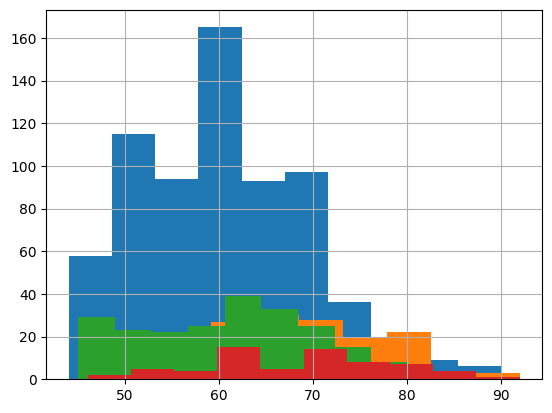

In [ ]:
df.groupby(['Gender','Sarc'])['Age'].hist()

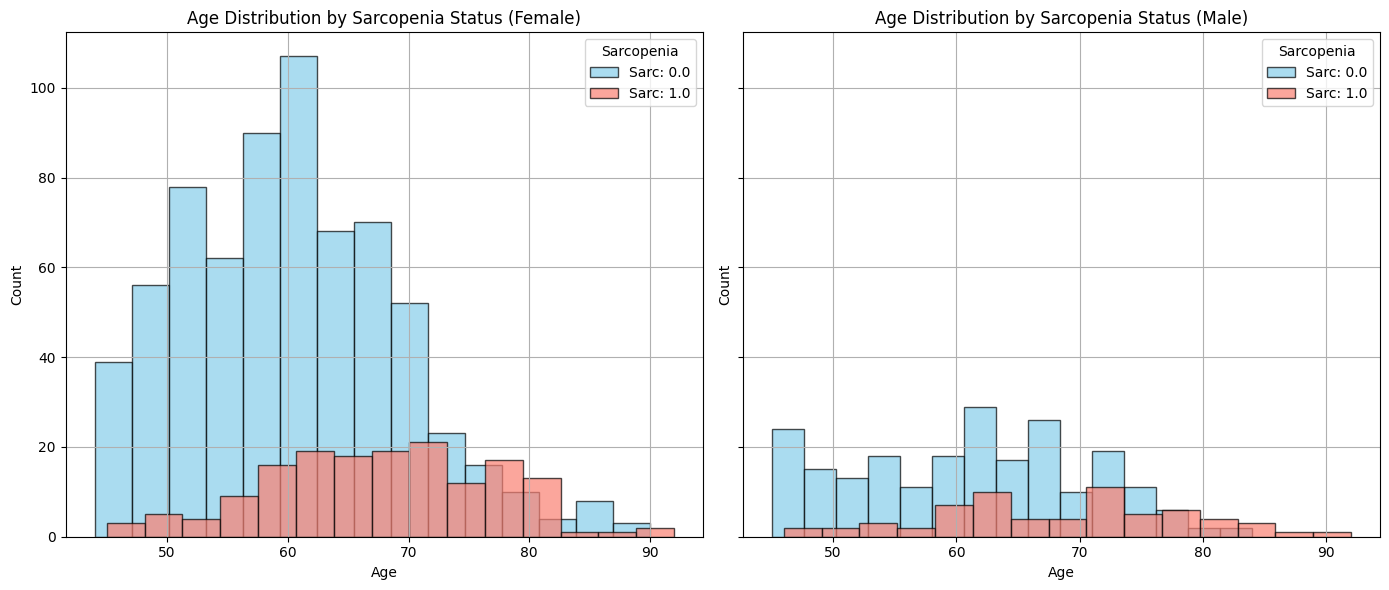

In [ ]:
# 📊 Create two subplots: one for Female (Gender = 0) and one for Male (Gender = 1)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 🎨 Define colors for Sarcopenia status
colors = {0: 'skyblue', 1: 'salmon'}
titles = {0: 'Female', 1: 'Male'}

# 📊 Loop through each gender
for gender, ax in zip([0, 1], axes):
    # Group by Sarcopenia within each gender
    grouped = df[df['Gender'] == gender].groupby('Sarc')

    # Plot each Sarcopenia group within the gender
    for sarc_status, group in grouped:
        ax.hist(group['Age'], bins=15, alpha=0.7, label=f'Sarc: {sarc_status}',
                color=colors[sarc_status], edgecolor='black')

    # 📝 Customize plot
    ax.set_title(f"Age Distribution by Sarcopenia Status ({titles[gender]})")
    ax.set_xlabel("Age")
    ax.set_ylabel("Count")
    ax.legend(title="Sarcopenia")
    ax.grid(True)

# 🛠️ Adjust layout
plt.tight_layout()
plt.show()

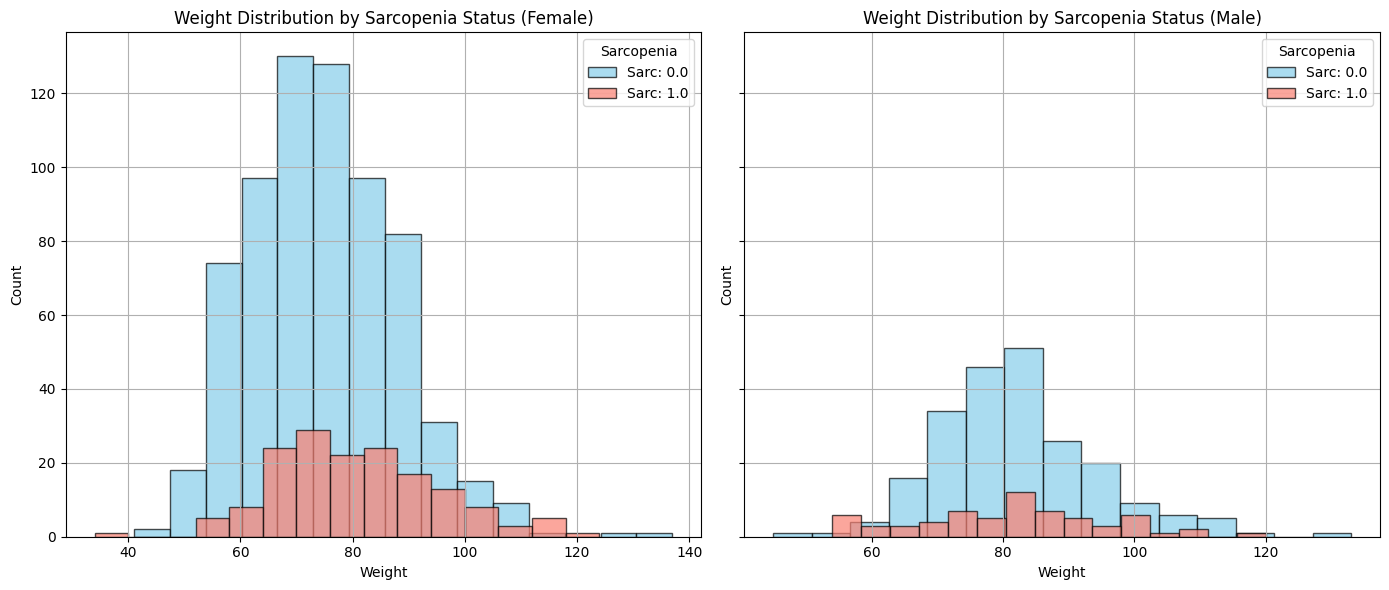

In [ ]:
#Create a similar plot for Weight

# 📊 Create two subplots: one for Female (Gender = 0) and one for Male (Gender = 1)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 🎨 Define colors for Sarcopenia status
colors = {0: 'skyblue', 1: 'salmon'}
titles = {0: 'Female', 1: 'Male'}

# 📊 Loop through each gender
for gender, ax in zip([0, 1], axes):
    # Group by Sarcopenia within each gender
    grouped = df[df['Gender'] == gender].groupby('Sarc')

    # Plot each Sarcopenia group within the gender
    for sarc_status, group in grouped:
        ax.hist(group['Weight'], bins=15, alpha=0.7, label=f'Sarc: {sarc_status}',
                color=colors[sarc_status], edgecolor='black')

    # 📝 Customize plot
    ax.set_title(f"Weight Distribution by Sarcopenia Status ({titles[gender]})")
    ax.set_xlabel("Weight")
    ax.set_ylabel("Count")
    ax.legend(title="Sarcopenia")
    ax.grid(True)

# 🛠️ Adjust layout
plt.tight_layout()
plt.show()

### **📊 3. Statistical Testing (T-Test) for Gender Differences**

In [ ]:
from scipy.stats import ttest_ind

# 📊 T-test for BMI difference between males and females
male_bmi = df[df['Gender'] == 1]['BMI']
female_bmi = df[df['Gender'] == 0]['BMI']

t_stat, p_val = ttest_ind(male_bmi, female_bmi, nan_policy='omit')
print(f"📊 T-test for BMI between Genders:\nT-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

📊 T-test for BMI between Genders:
T-statistic = -7.13, p-value = 0.0000


- What does it mean to have a small p value?
- Can you repat the same test for GRS to see if there is any difference between Male and Female groups

In [ ]:
male_bmi = df[df['Gender'] == 1]['HGS']
female_bmi = df[df['Gender'] == 0]['HGS']

t_stat, p_val = ttest_ind(male_bmi, female_bmi, nan_policy='omit')
print(f"📊 T-test for HGS between Genders:\nT-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

📊 T-test for HGS between Genders:
T-statistic = 29.62, p-value = 0.0000


# **🔖 Step 3: Training Gender-Specific Gradient Boosting Models**
## **🎯 Objective:**
Train two separate Gradient Boosting Models (GBM) for predicting Sarcopenia, one for Male patients and another for Female patients, to capture gender-specific patterns in the data.

### **1. Split the Dataset by Gender**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# 📊 Define features
numeric_features = ['Age', 'Weight', 'Height', 'CST', 'HGS', 'BMI']
categorical_features = ['DM', 'HT', 'Exercise', 'Education', 'Smoking']
target = 'Sarc'


In [ ]:
#What makes a feature numerical or categorical?
#Why are we grouping features as numeical or categorical?

In [ ]:
# 📊 Split data by Gender
df_female = df[df['Gender'] == 0]
df_male = df[df['Gender'] == 1]

# 📊 Train-Test Split for Females
X_female = df_female[numeric_features + categorical_features]
y_female = df_female[target]
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# 📊 Train-Test Split for Males
X_male = df_male[numeric_features + categorical_features]
y_male = df_male[target]
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

### **2. Create a preprocessing pipeline**

In [ ]:
# ⚙️ Preprocessing pipeline: Scale numeric and encode categorical features

# usew Standardscaler() for numerical features and OneHotEncoder for the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ]
)


### **2. Train Gradient Boosting Models for Each Gender**

In [ ]:
# 📈 Gradient Boosting Classifier with preprocessing for Females
pipeline_female = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
])

# 📈 Gradient Boosting Classifier with preprocessing for Males
pipeline_male = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
])

# 🚀 Train the model for Females
pipeline_female.fit(X_train_female, y_train_female)
print("✅ Gradient Boosting model trained for Female patients.")

# 🚀 Train the model for Males
pipeline_male.fit(X_train_male, y_train_male)
print("✅ Gradient Boosting model trained for Male patients.")


✅ Gradient Boosting model trained for Female patients.
✅ Gradient Boosting model trained for Male patients.


### **3. Evaluate Model Performance**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# 📊 Evaluate Female Model
y_pred_female = pipeline_female.predict(X_test_female)
y_prob_female = pipeline_female.predict_proba(X_test_female)[:, 1]

print("📊 Classification Report for Female Model:")
print(classification_report(y_test_female, y_pred_female))
print(f"🔍 ROC AUC Score (Female): {roc_auc_score(y_test_female, y_prob_female):.2f}")

# 📊 Evaluate Male Model
y_pred_male = pipeline_male.predict(X_test_male)
y_prob_male = pipeline_male.predict_proba(X_test_male)[:, 1]

print("📊 Classification Report for Male Model:")
print(classification_report(y_test_male, y_pred_male))
print(f"🔍 ROC AUC Score (Male): {roc_auc_score(y_test_male, y_prob_male):.2f}")


📊 Classification Report for Female Model:
              precision    recall  f1-score   support

         0.0       0.96      0.46      0.62       141
         1.0       0.25      0.90      0.40        29

    accuracy                           0.54       170
   macro avg       0.61      0.68      0.51       170
weighted avg       0.84      0.54      0.58       170

🔍 ROC AUC Score (Female): 0.72
📊 Classification Report for Male Model:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        50
         1.0       0.56      0.62      0.59         8

    accuracy                           0.88        58
   macro avg       0.75      0.77      0.76        58
weighted avg       0.89      0.88      0.88        58

🔍 ROC AUC Score (Male): 0.89


In [ ]:
import ipywidgets as widgets

model_choice = widgets.Dropdown(
    options=['Gradient Boosting', 'Random Forest'],
    value='Gradient Boosting',
    description='Select Model:',
)

def train_model(choice):
    if choice == 'Gradient Boosting':
        model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    else:
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_female, y_female)
    print(f"✅ {choice} model trained!")

widgets.interact(train_model, choice=model_choice)

interactive(children=(Dropdown(description='Select Model:', options=('Gradient Boosting', 'Random Forest'), va…

<function __main__.train_model(choice)>

In [ ]:
# for the selected model that is trained above, evaluate the mode for both male and female.
#Print the classification report and AUC score

# 📊 Evaluate Female Model
y_pred_female = pipeline_female.predict(X_test_female)
y_prob_female = pipeline_female.predict_proba(X_test_female)[:, 1]

print("📊 Classification Report for Female Model:")
print(classification_report(y_test_female, y_pred_female))
print(f"🔍 ROC AUC Score (Female): {roc_auc_score(y_test_female, y_prob_female):.2f}")

# 📊 Evaluate Male Model
y_pred_male = pipeline_male.predict(X_test_male)
y_prob_male = pipeline_male.predict_proba(X_test_male)[:, 1]

print("📊 Classification Report for Male Model:")
print(classification_report(y_test_male, y_pred_male))
print(f"🔍 ROC AUC Score (Male): {roc_auc_score(y_test_male, y_prob_male):.2f}")


📊 Classification Report for Female Model:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       141
         1.0       0.73      0.55      0.63        29

    accuracy                           0.89       170
   macro avg       0.82      0.75      0.78       170
weighted avg       0.88      0.89      0.88       170

🔍 ROC AUC Score (Female): 0.94
📊 Classification Report for Male Model:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        50
         1.0       0.00      0.00      0.00         8

    accuracy                           0.83        58
   macro avg       0.43      0.48      0.45        58
weighted avg       0.74      0.83      0.78        58

🔍 ROC AUC Score (Male): 0.56


## **4. Visualize Feature Importance**

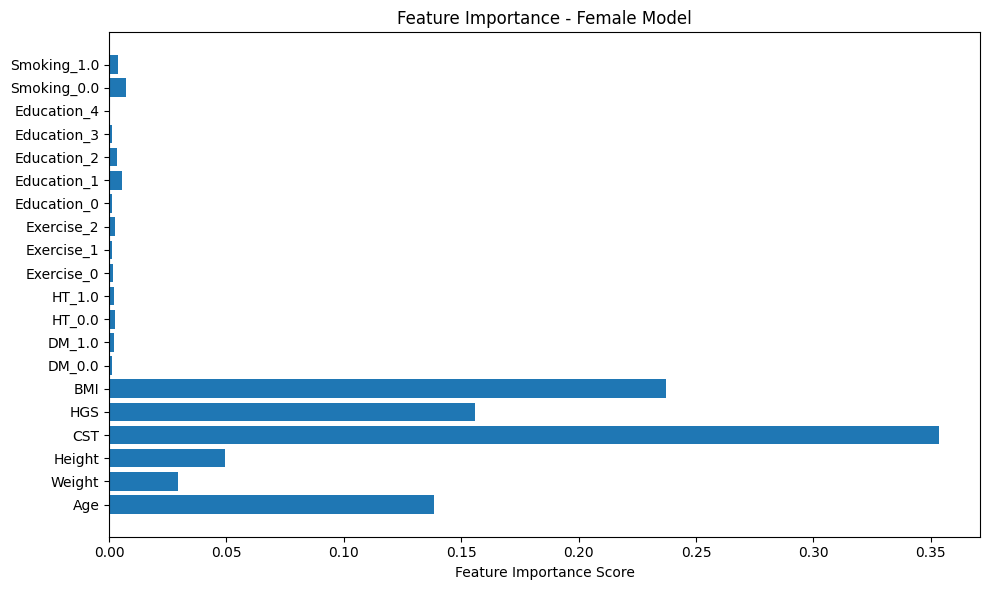

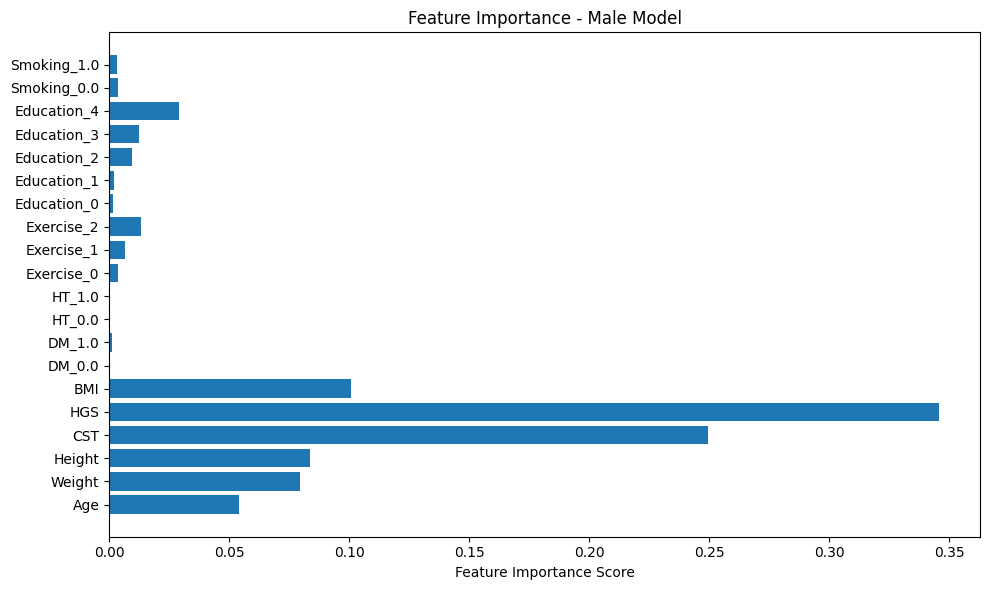

In [ ]:
import matplotlib.pyplot as plt

# 📊 Extract feature importances after preprocessing
def plot_feature_importance(pipeline, feature_names, title):
    model = pipeline.named_steps['classifier']
    onehot_features = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
    all_features = list(feature_names) + list(onehot_features)

    importances = model.feature_importances_

    plt.figure(figsize=(10, 6))
    plt.barh(all_features, importances)
    plt.xlabel("Feature Importance Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 📊 Plot Feature Importance for Female Model
plot_feature_importance(pipeline_female, numeric_features, "Feature Importance - Female Model")

# 📊 Plot Feature Importance for Male Model
plot_feature_importance(pipeline_male, numeric_features, "Feature Importance - Male Model")


# **🔖 Step 4:  Model Calibration and Performance Comparison**
## **🎯 Objective**

The goal of this step is to calibrate the Gradient Boosting Models (GBMs) trained for male and female patients to improve the reliability of the predicted probabilities for detecting Sarcopenia.

Model calibration ensures that the predicted probabilities accurately reflect the true likelihood of the condition, which is crucial in medical decision-making where overconfidence or underconfidence in predictions can lead to misdiagnosis or overtreatment.

By comparing the performance of the calibrated and uncalibrated models using metrics like the ROC AUC Score, Brier Score, and Calibration Curves, we aim to:

Enhance Probability Accuracy: Align predicted probabilities with actual outcomes, ensuring a 70% predicted probability truly means ~70% chance of Sarcopenia.
Support Better Clinical Decisions: Provide healthcare professionals with more reliable risk scores for more accurate patient diagnosis and management.
Evaluate Model Improvements: Compare the calibrated models against uncalibrated ones to validate performance improvement in terms of classification and probability estimation.
Visualize Calibration: Use calibration curves to visually assess how close the predicted probabilities are to the true event probabilities.

### **1.Calibrate the Gradient Boosting Models**

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

# 📊 Calibrate Female Model
calibrated_female = CalibratedClassifierCV(estimator=pipeline_female, method='sigmoid', cv=5)
calibrated_female.fit(X_train_female, y_train_female)

# 📊 Calibrate Male Model
calibrated_male = CalibratedClassifierCV(estimator=pipeline_male, method='sigmoid', cv=5)
calibrated_male.fit(X_train_male, y_train_male)

print("✅ Models calibrated successfully.")


✅ Models calibrated successfully.


### **2.Evaluate Calibrated vs. Uncalibrated Models**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, brier_score_loss

# 📊 Evaluate Female Model
# --- Uncalibrated ---
y_prob_female_uncal = pipeline_female.predict_proba(X_test_female)[:, 1]
y_pred_female_uncal = pipeline_female.predict(X_test_female)

# --- Calibrated ---
y_prob_female_cal = calibrated_female.predict_proba(X_test_female)[:, 1]
y_pred_female_cal = calibrated_female.predict(X_test_female)

# 📊 Evaluate Male Model
# --- Uncalibrated ---
y_prob_male_uncal = pipeline_male.predict_proba(X_test_male)[:, 1]
y_pred_male_uncal = pipeline_male.predict(X_test_male)

# --- Calibrated ---
y_prob_male_cal = calibrated_male.predict_proba(X_test_male)[:, 1]
y_pred_male_cal = calibrated_male.predict(X_test_male)

# 📊 Compare Classification Reports
print("📊 Female Model (Uncalibrated):")
print(classification_report(y_test_female, y_pred_female_uncal))
print(f"🔍 ROC AUC (Uncalibrated): {roc_auc_score(y_test_female, y_prob_female_uncal):.2f}")
print(f"🔍 Brier Score (Uncalibrated): {brier_score_loss(y_test_female, y_prob_female_uncal):.4f}")

print("\n📊 Female Model (Calibrated):")
print(classification_report(y_test_female, y_pred_female_cal))
print(f"🔍 ROC AUC (Calibrated): {roc_auc_score(y_test_female, y_prob_female_cal):.2f}")
print(f"🔍 Brier Score (Calibrated): {brier_score_loss(y_test_female, y_prob_female_cal):.4f}")

print("\n📊 Male Model (Uncalibrated):")
print(classification_report(y_test_male, y_pred_male_uncal))
print(f"🔍 ROC AUC (Uncalibrated): {roc_auc_score(y_test_male, y_prob_male_uncal):.2f}")
print(f"🔍 Brier Score (Uncalibrated): {brier_score_loss(y_test_male, y_prob_male_uncal):.4f}")

print("\n📊 Male Model (Calibrated):")
print(classification_report(y_test_male, y_pred_male_cal))
print(f"🔍 ROC AUC (Calibrated): {roc_auc_score(y_test_male, y_prob_male_cal):.2f}")
print(f"🔍 Brier Score (Calibrated): {brier_score_loss(y_test_male, y_prob_male_cal):.4f}")


📊 Female Model (Uncalibrated):
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       141
         1.0       0.73      0.55      0.63        29

    accuracy                           0.89       170
   macro avg       0.82      0.75      0.78       170
weighted avg       0.88      0.89      0.88       170

🔍 ROC AUC (Uncalibrated): 0.94
🔍 Brier Score (Uncalibrated): 0.0826

📊 Female Model (Calibrated):
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       141
         1.0       0.80      0.41      0.55        29

    accuracy                           0.88       170
   macro avg       0.85      0.70      0.74       170
weighted avg       0.87      0.88      0.87       170

🔍 ROC AUC (Calibrated): 0.95
🔍 Brier Score (Calibrated): 0.0773

📊 Male Model (Uncalibrated):
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        50
         1.0  

### **3.Visualize Calibration with Reliability Curves**

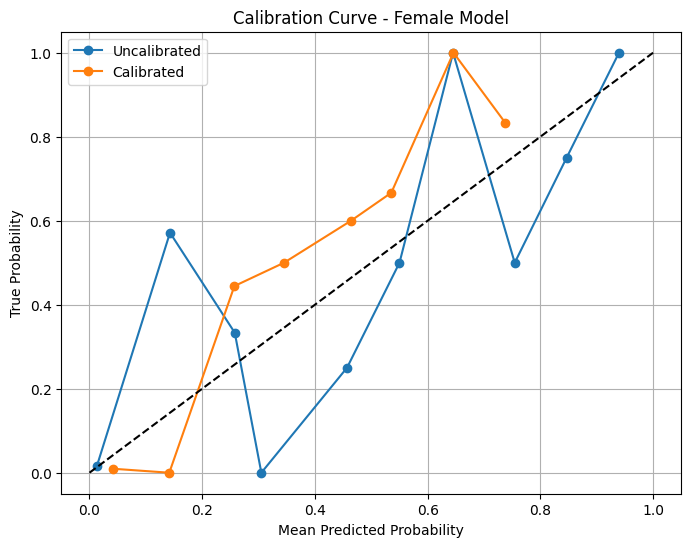

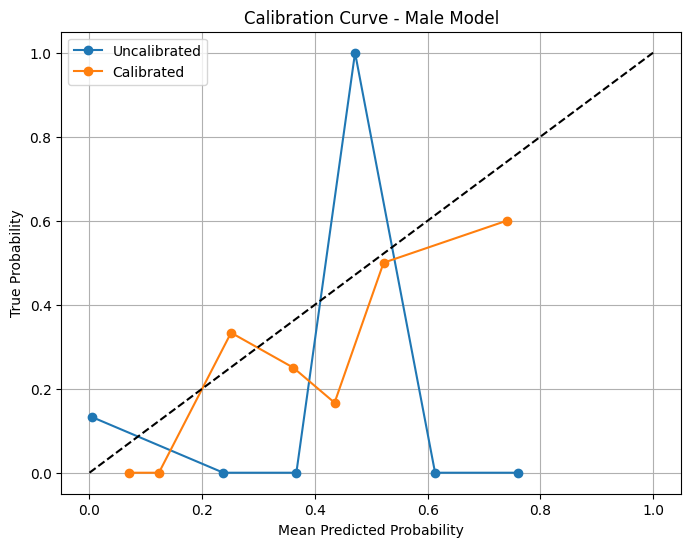

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

def plot_calibration(y_true, y_prob_uncal, y_prob_cal, title):
    plt.figure(figsize=(8, 6))

    # 📊 Calibration curves
    prob_true_uncal, prob_pred_uncal = calibration_curve(y_true, y_prob_uncal, n_bins=10)
    prob_true_cal, prob_pred_cal = calibration_curve(y_true, y_prob_cal, n_bins=10)

    # 📈 Plot uncalibrated model
    plt.plot(prob_pred_uncal, prob_true_uncal, label="Uncalibrated", marker='o')

    # 📈 Plot calibrated model
    plt.plot(prob_pred_cal, prob_true_cal, label="Calibrated", marker='o')

    # 📉 Perfect calibration line
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')

    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("True Probability")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 📊 Plot Calibration Curve for Female Model
plot_calibration(y_test_female, y_prob_female_uncal, y_prob_female_cal, "Calibration Curve - Female Model")

# 📊 Plot Calibration Curve for Male Model
plot_calibration(y_test_male, y_prob_male_uncal, y_prob_male_cal, "Calibration Curve - Male Model")


# **🔖 Step 5:  Fine-Tuning the Decision Threshold to Balance Precision and Recall**
## **🎯 Objective**
The objective of this step is to fine-tune the decision threshold for the calibrated Gradient Boosting Models to achieve an optimal balance between precision and recall in predicting Sarcopenia.

In medical diagnosis, using the default threshold of 0.5 may not always be ideal. By adjusting the decision threshold, we can:

Improve Recall (Sensitivity): Minimize False Negatives to ensure high-risk patients are correctly identified.
Control Precision (Specificity): Reduce False Positives to avoid unnecessary treatment for healthy patients.
Balance Trade-offs: Find the best threshold that minimizes risks of both misdiagnosis and overtreatment.

### **1. Analyze Precision-Recall vs. Threshold**

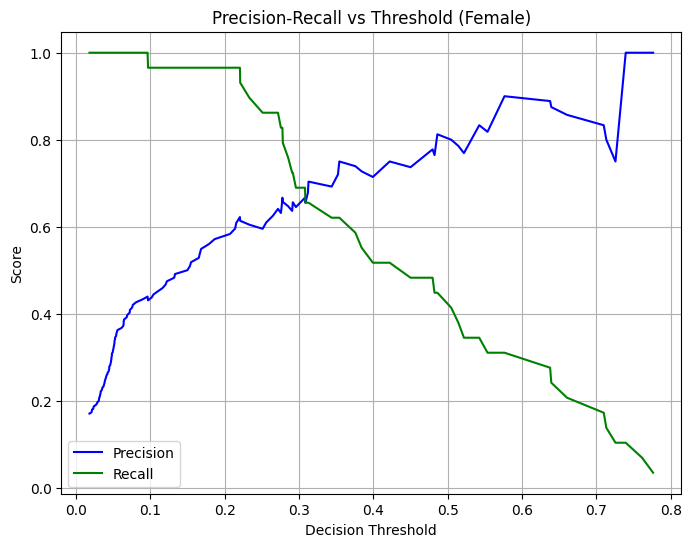

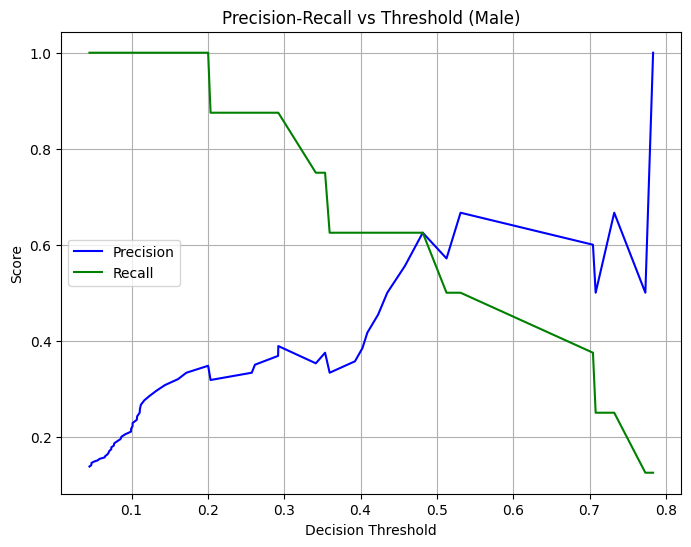

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(y_true, y_probs, title):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision[:-1], label="Precision", color='b')
    plt.plot(thresholds, recall[:-1], label="Recall", color='g')
    plt.xlabel("Decision Threshold")
    plt.ylabel("Score")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 📊 Plot for Female Model
plot_precision_recall_vs_threshold(y_test_female, y_prob_female_cal, "Precision-Recall vs Threshold (Female)")

# 📊 Plot for Male Model
plot_precision_recall_vs_threshold(y_test_male, y_prob_male_cal, "Precision-Recall vs Threshold (Male)")


### **2. Apply the optimized threshold**

In [ ]:
# 🎯 Set optimized thresholds for each gender
optimized_threshold_female = 0.35  # Example value based on the plot
optimized_threshold_male = 0.40    # Example value based on the plot

# 📊 Apply threshold to predictions
y_pred_female_optimized = (y_prob_female_cal >= optimized_threshold_female).astype(int)
y_pred_male_optimized = (y_prob_male_cal >= optimized_threshold_male).astype(int)


### **3. Evaluate model performance with the new threshold**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 📊 Evaluate Female Model
print("📊 Classification Report for Female Model (Optimized Threshold):")
print(classification_report(y_test_female, y_pred_female_optimized))

# 📊 Confusion Matrix for Female Model
cm_female = confusion_matrix(y_test_female, y_pred_female_optimized)
print("🔍 Confusion Matrix (Female):\n", cm_female)

# 📊 Evaluate Male Model
print("\n📊 Classification Report for Male Model (Optimized Threshold):")
print(classification_report(y_test_male, y_pred_male_optimized))

# 📊 Confusion Matrix for Male Model
cm_male = confusion_matrix(y_test_male, y_pred_male_optimized)
print("🔍 Confusion Matrix (Male):\n", cm_male)


📊 Classification Report for Female Model (Optimized Threshold):
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       141
         1.0       0.72      0.62      0.67        29

    accuracy                           0.89       170
   macro avg       0.82      0.79      0.80       170
weighted avg       0.89      0.89      0.89       170

🔍 Confusion Matrix (Female):
 [[134   7]
 [ 11  18]]

📊 Classification Report for Male Model (Optimized Threshold):
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88        50
         1.0       0.38      0.62      0.48         8

    accuracy                           0.81        58
   macro avg       0.66      0.73      0.68        58
weighted avg       0.86      0.81      0.83        58

🔍 Confusion Matrix (Male):
 [[42  8]
 [ 3  5]]


### **4. Visualize the impact of the threshold**

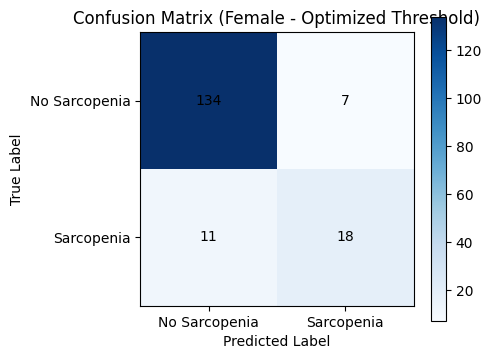

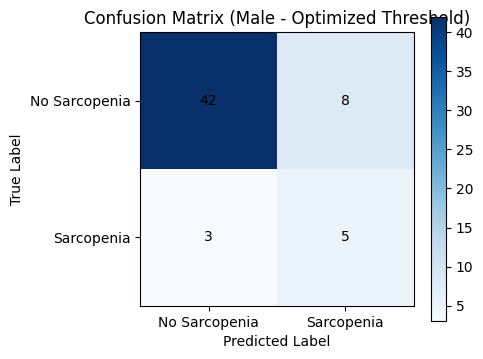

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title)
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['No Sarcopenia', 'Sarcopenia'])
    plt.yticks(tick_marks, ['No Sarcopenia', 'Sarcopenia'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.grid(False)

    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")

    plt.tight_layout()
    plt.show()

# 📊 Plot Confusion Matrices
plot_confusion_matrix(cm_female, "Confusion Matrix (Female - Optimized Threshold)")
plot_confusion_matrix(cm_male, "Confusion Matrix (Male - Optimized Threshold)")


In [ ]:
threshold_slider = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.05, description='Threshold:')

def adjust_threshold(threshold):
    y_pred_thresh = (calibrated_female.predict_proba(X_female)[:, 1] >= threshold).astype(int)
    from sklearn.metrics import classification_report
    print(classification_report(y_female, y_pred_thresh))

widgets.interact(adjust_threshold, threshold=threshold_slider)

interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=0.9, min=0.1, step=0.05), Output())…

<function __main__.adjust_threshold(threshold)>

In [ ]:
def adjust_threshold(threshold):
    y_pred_thresh = (calibrated_male.predict_proba(X_female)[:, 1] >= threshold).astype(int)
    from sklearn.metrics import classification_report
    print(classification_report(y_female, y_pred_thresh))

widgets.interact(adjust_threshold, threshold=threshold_slider)

interactive(children=(FloatSlider(value=0.44999999999999996, description='Threshold:', max=0.9, min=0.1, step=…

<function __main__.adjust_threshold(threshold)>

In [ ]:
import joblib  # For saving models
# Save the cleaned data for Day 2
df.to_csv("Cleaned_Sarcopenia_Data.csv", index=False)

print("✅ Cleaned dataset saved for Day 2.")

# Save the trained models
joblib.dump(pipeline_female, "female_model.pkl")
joblib.dump(pipeline_male, "male_model.pkl")
print("✅ Models for male and female saved for Day 2.")


✅ Cleaned dataset saved for Day 2.
✅ Models for male and female saved for Day 2.
